<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Keras_Book_3_4_Classifying_IMDB_movie_reviews_(binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hardware info


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!nvidia-smi

Wed Sep 22 20:44:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    71W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11255168740731039761, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16395666114107551759
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [5]:
!cat /proc/meminfo

MemTotal:       13302916 kB
MemFree:        10910532 kB
MemAvailable:   12128080 kB
Buffers:           52776 kB
Cached:          1265712 kB
SwapCached:            0 kB
Active:           904100 kB
Inactive:        1192108 kB
Active(anon):     667300 kB
Inactive(anon):     2484 kB
Active(file):     236800 kB
Inactive(file):  1189624 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               412 kB
Writeback:             0 kB
AnonPages:        777568 kB
Mapped:           489940 kB
Shmem:              3244 kB
KReclaimable:      81792 kB
Slab:             135392 kB
SReclaimable:      81792 kB
SUnreclaim:        53600 kB
KernelStack:        4944 kB
PageTables:         8748 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651456 kB
Committed_AS:    3690232 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       46656 kB
VmallocChunk:          0 kB
Percpu:          

# Loading input
https://keras.io/api/datasets/

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

###testing

In [7]:
len(train_data)

25000

In [8]:
len(test_data)

25000

In [9]:
len(train_data[0])

218

## Converting encoded reviews back to English text

In [10]:
word_index = imdb.get_word_index()

In [11]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [12]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[1]])

print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


movie[1] name : Killer Workout ;D

## Preparing the data

In [13]:
import numpy as np

# One-Hot Encode 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### testing

In [14]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Poor Model (Overfitted)



In [18]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

## Validating poor model
split train and valid data

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 42ms/step - loss: 0.5084 - accuracy: 0.7905 - val_loss: 0.3771 - val_accuracy: 0.8717
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3032 - accuracy: 0.9015 - val_loss: 0.3017 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2222 - accuracy: 0.9289 - val_loss: 0.2996 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1732 - accuracy: 0.9435 - val_loss: 0.2749 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1427 - accuracy: 0.9529 - val_loss: 0.2808 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1140 - accuracy: 0.9653 - val_loss: 0.3105 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0991 - accuracy: 0.9703 - val_loss: 0.3127 - val_accuracy: 0.8816
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

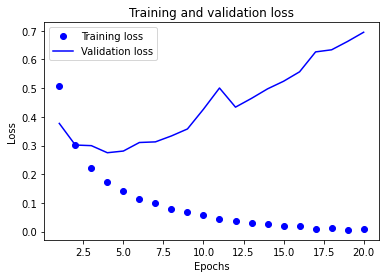

In [23]:
# Plotting history
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

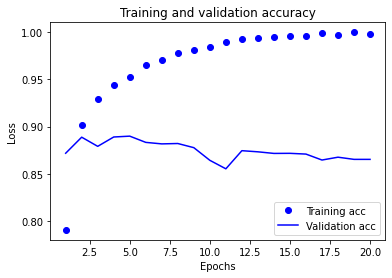

In [24]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## poor model results
loss: 0.7343 - accuracy: 0.8509

In [25]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7588 - accuracy: 0.8513


# Better model

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [27]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=4,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 34ms/step - loss: 0.5027 - accuracy: 0.8015 - val_loss: 0.3911 - val_accuracy: 0.8622
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.3038 - accuracy: 0.9039 - val_loss: 0.3042 - val_accuracy: 0.8879
Epoch 3/4
30/30 [==============================] - 1s 20ms/step - loss: 0.2260 - accuracy: 0.9257 - val_loss: 0.2786 - val_accuracy: 0.8900
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.1807 - accuracy: 0.9404 - val_loss: 0.2739 - val_accuracy: 0.8891


## Validating Better model

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

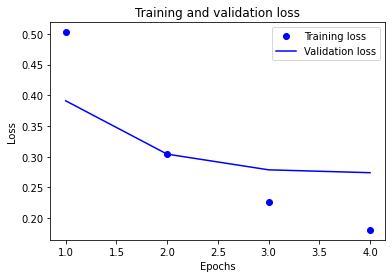

In [29]:
# Plotting history
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

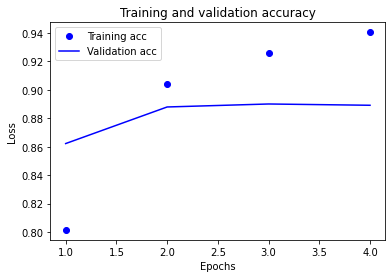

In [30]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Better model results
loss: 0.2963 - accuracy: 0.8808

In [31]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2913 - accuracy: 0.8822


# Training on full data
loss: 0.3107 - accuracy: 0.8780

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4468 - accuracy: 0.8190
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2557 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1965 - accuracy: 0.9313
Epoch 4/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1653 - accuracy: 0.9422


In [33]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3074 - accuracy: 0.8800


In [34]:
#Predicting
model.predict(x_test)

array([[0.150786  ],
       [0.9997192 ],
       [0.5808302 ],
       ...,
       [0.08682986],
       [0.0488949 ],
       [0.5014811 ]], dtype=float32)